# Deep Learning w PyTorch IV (mnist, mlp)
- Part I: [Deep Learning w PyTorch I (intro)](https://github.com/tm1611/Deep-Learning/blob/master/Deep%20Learning%20w%20PyTorch%20I%20(intro).ipynb)
- Part II: [Deep Learning w PyTorch II (define a nn)](https://github.com/tm1611/Deep-Learning/blob/master/Deep%20Learning%20w%20PyTorch%20II%20(define%20a%20nn).ipynb)
- Part III: [Deep Learning w PyTorch III (training nn, theory)](https://github.com/tm1611/Deep-Learning/blob/master/Deep%20Learning%20w%20PyTorch%20III%20(training%20nn%2C%20theory).ipynb)
- Part V: [Deep Learning w PyTorch V (fmnist, mlp, inference and validation)](https://github.com/tm1611/Deep-Learning/blob/master/Deep%20Learning%20w%20PyTorch%20V%20(fmnist%2C%20mlp%2C%20inference%20and%20validation).ipynb)


## 1. Introduction
Our next step is to demonstrate how a neural network can be trained on the [mnist data](https://en.wikipedia.org/wiki/MNIST_database). We will see how to fit a model before moving on to inference, validation and other topics.

The objective is to identify handwritten numbers using a multilayer perceptron neural network with PyTorch.

In [1]:
# torch imports
import torch
from torch import nn
from torchvision import datasets, transforms
from torch import optim

# visualizations
import helper
%matplotlib inline

## 2. The Data
Import the data from `datasets.MNIST()`, define a transformation to normalize the data, use `DataLoader()` for importing a batch of images.

In [2]:
# Transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])

# Download Data 
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', 
                          download=True, 
                          train=True, 
                          transform=transform)

# Define DataLoader
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=64, 
                                          shuffle=True)

## 3. The Model
- Define a multilayer perceptron neural network: `model = nn.Sequential(...)` with linear layers (`nn.Linear()`)
- Define loss function: `criterion = nn.NLLLoss()` 
- Define optimizer: `optimizer = optim.SGD(...)`
- use a for-loop: `for e in range(epochs): ...` that tracks the `running_loss = 0`
 - load images `for images, labels in trainloader:`
 - flatten images`images = images.reshape(images.shape[0], -1)
 - set gradients to zero: `optimizer.zero_grad()`
 - forward pass: `output = model.forward(iamges)`
 - calculate loss: `loss = criterion(output, labels)`
 - calculate gradients of loss function: `loss.backward()`
 - take one step towards steepest descent: `optimizer.step()`
- Add loss to running_loss: `running_loss += loss.item()`

In [3]:
# Parameters
epochs = 20

# Model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
                      
# criterion
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.005)

# Gradient descent
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.reshape(images.shape[0], -1)
        optimizer.zero_grad()
        
        # forward pass
        output = model.forward(images)
        loss = criterion(output, labels)
        
        # backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch: {}/{}".format(e+1, epochs))
        train_loss = running_loss / len(trainloader)
        print(f"Training loss:", round(train_loss,4))

Epoch: 1/20
Training loss: 0.3433
Epoch: 2/20
Training loss: 0.189
Epoch: 3/20
Training loss: 0.1635
Epoch: 4/20
Training loss: 0.1532
Epoch: 5/20
Training loss: 0.1321
Epoch: 6/20
Training loss: 0.1305
Epoch: 7/20
Training loss: 0.1282
Epoch: 8/20
Training loss: 0.1189
Epoch: 9/20
Training loss: 0.1121
Epoch: 10/20
Training loss: 0.1137
Epoch: 11/20
Training loss: 0.1104
Epoch: 12/20
Training loss: 0.1078
Epoch: 13/20
Training loss: 0.1061
Epoch: 14/20
Training loss: 0.1046
Epoch: 15/20
Training loss: 0.0953
Epoch: 16/20
Training loss: 0.0979
Epoch: 17/20
Training loss: 0.0992
Epoch: 18/20
Training loss: 0.0875
Epoch: 19/20
Training loss: 0.0888
Epoch: 20/20
Training loss: 0.0915


## 4. Results
Next, we'll check the predictions of this model. We'll turn off gradients to speed up the process (and we don't need them here anyway). We can do this temporarily as:
```python
with torch.no_grad():
    logps = model.forward(img)
```
The combination of `nn.NLLLoss()` (see [documentation](https://pytorch.org/docs/stable/nn.html#nllloss)) which is the negative log likelihood loss with `nn.LogSoftmax(dim=1)` yields log-probabilities. Taking the exponential gives us probabilities for each class.

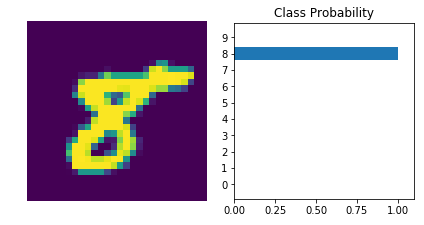

In [4]:
# load one batch
images, labels = next(iter(trainloader))

# Take first image
img = images[0].reshape(1, 784)

# Turn off gradients
with torch.no_grad():
    output = model.forward(img)
    
# take exp
probs = torch.exp(output)

# Visualize results with helper
helper.view_classify(img.view(1, 28, 28), probs)

## 5. Next steps
In the next notebook, we'll introduce a related dataset (fashion mnist). After fitting a neural network model for prediction we'll take one step further and use training curves for inference and validating the fit of the model on unseen data calculating the accuracy. Moreover, we'll use dropout to improve the generalizability of the model.  